In [ ]:
"""
This notebook is the generate 3 channel images using CWT for wave files for a selected sesssion.
"""

'\nThis notebook is the generate 3 channel images using CWT for wave files for a selected sesssion.\n'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [2]:
!pip install pyWavelets

In [3]:
import os
import pandas as pd
import numpy as np
import scipy.io as sio
from scipy import signal
import matplotlib.pyplot as plt
import pywt
import cv2

In [ ]:
os.path.join(folder_path, file)

NameError: name 'folder_path' is not defined

In [4]:
folder_path = os.getcwd()
file = r'drive/MyDrive/AC_ToDrive/DriveVersionIEMOCAP/Session1/Ses01F_impro01/Ses01F_impro01_F000.wav'
file_path = r'/content/drive/MyDrive/AC_ToDrive/DriveVersionIEMOCAP/Session1/Ses01F_impro01/Ses01F_impro01_F000.wav'

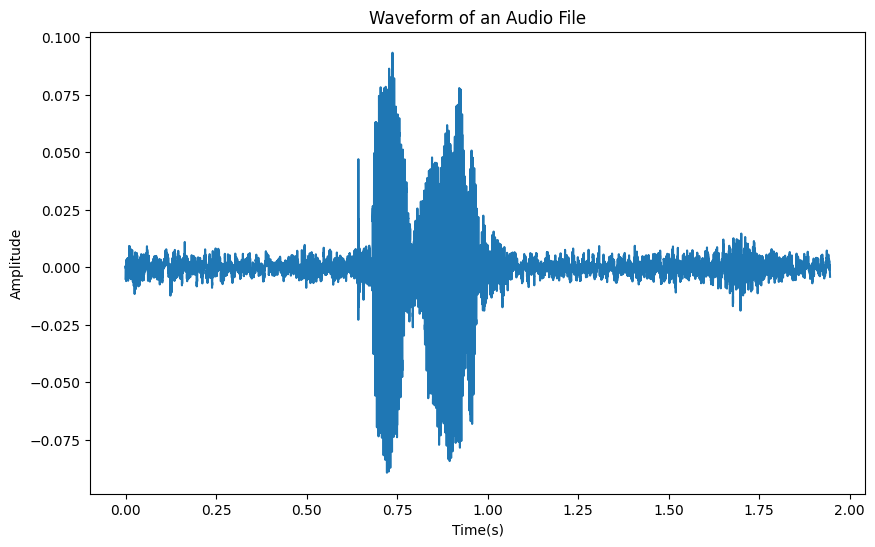

In [5]:
sample_rate, data = sio.wavfile.read(os.path.join(folder_path, file))
data = data / 32768
duration = len(data) / sample_rate
time = np.linspace(0., duration, len(data))
plt.figure(figsize=(10, 6))
plt.plot(time, data)
plt.title("Waveform of an Audio File")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
ex_im

array([[[0.49640901, 0.50275871, 0.47056754],
        [0.49625794, 0.50306562, 0.47039215],
        [0.49630148, 0.50293332, 0.47102817],
        ...,
        [0.49634836, 0.50298668, 0.46957922],
        [0.49636443, 0.50272734, 0.4709585 ],
        [0.49638493, 0.50275702, 0.47190578]],

       [[0.49640901, 0.50275871, 0.47056754],
        [0.49625794, 0.50306562, 0.47039215],
        [0.49630148, 0.50293332, 0.47102817],
        ...,
        [0.49634836, 0.50298668, 0.46957922],
        [0.49636443, 0.50272734, 0.4709585 ],
        [0.49638493, 0.50275702, 0.47190578]],

       [[0.49640901, 0.50275871, 0.47056754],
        [0.49625794, 0.50306562, 0.47039215],
        [0.49630148, 0.50293332, 0.47102817],
        ...,
        [0.49634836, 0.50298668, 0.46957922],
        [0.49636443, 0.50272734, 0.4709585 ],
        [0.49638493, 0.50275702, 0.47190578]],

       ...,

       [[0.49593026, 0.50266712, 0.47042867],
        [0.49667526, 0.50253867, 0.4695245 ],
        [0.49658193, 0

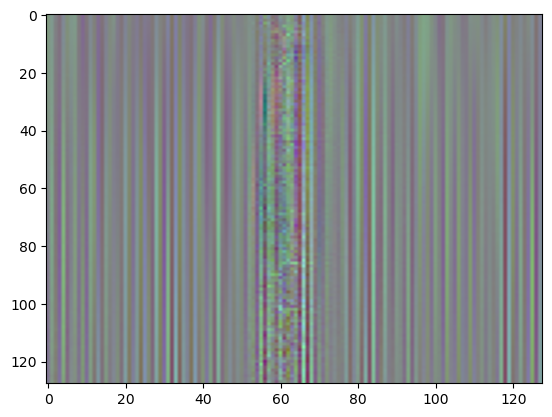

In [ ]:
ex_im = create_images(data, sample_rate)
plt.imshow(ex_im, aspect='auto')


In [6]:
def downsampling(data, fs_source, fs_down):
    number_of_samples = int(len(data) * fs_down / fs_source)
    return signal.resample(data, number_of_samples)
def preprocessing_wav(wav_file_path, fs_down):
    sample_rate, data = sio.wavfile.read(wav_file_path)
    data = data / 32768
    data = downsampling(data, sample_rate, fs_down)
    return fs_down, data
def create_images(data, sample_rate):
    #scales_total = np.logspace(np.log10(1), np.log10(256), num_scales)
    scales_total = range(1,193)
    num_scales = len(scales_total)
    scales1 = scales_total[:num_scales//3]
    scales2 = scales_total[num_scales//3:2*num_scales//3]
    scales3 = scales_total[2*num_scales//3:]
    R_channel, frequencies1 = pywt.cwt(data, scales1, 'morl', sampling_period=1/sample_rate)
    G_channel, frequencies2 = pywt.cwt(data, scales2, 'morl', sampling_period=1/sample_rate)
    B_channel, frequencies3 = pywt.cwt(data, scales3, 'morl', sampling_period=1/sample_rate)

    R_channel = (R_channel - R_channel.min()) / (R_channel.max() - R_channel.min())
    G_channel = (G_channel - G_channel.min()) / (G_channel.max() - G_channel.min())
    B_channel = (B_channel - B_channel.min()) / (B_channel.max() - B_channel.min())
    RGB_image = np.stack((R_channel, G_channel, B_channel), axis=-1)

    return cv2.resize(RGB_image, (128, 128), interpolation=cv2.INTER_LINEAR)

## CWT

In [ ]:
rgb = create_images(data, 8000)
np.shape(rgb)

(128, 128, 3)

In [15]:
## creating 3 channel images out of all wav files in session 1
directory = os.path.join(folder_path, r'drive/MyDrive/AC_ToDrive/DriveVersionIEMOCAP/Session2')
images = []
i = 0
for sub_folder in sorted(os.listdir(directory)):
    sub_folder_path = os.path.join(directory, sub_folder)
    #print(20*'*')
    #print(sub_folder)
    for file in sorted(os.listdir(sub_folder_path)):
      i += 1
print(i)





1822


In [8]:
## creating 3 channel images out of all wav files in session 1
directory = os.path.join(folder_path, r'drive/MyDrive/AC_ToDrive/DriveVersionIEMOCAP/Session4')
images = []
i = 0
for sub_folder in sorted(os.listdir(directory)):
    sub_folder_path = os.path.join(directory, sub_folder)
    print(20*'*')
    print(sub_folder)
    for file in sorted(os.listdir(sub_folder_path)):
        if file.endswith('.wav'):
            file_path = os.path.join(sub_folder_path, file)
            sample_rate, data = preprocessing_wav(file_path, 8000)
            image = create_images(data, sample_rate)
            images.append(image)
        else:
            pass
        print(f'{file} successfully read')
images = np.array(images)
print(np.shape(images))



********************
Ses04F_impro01
Ses04F_impro01_F000.wav successfully read
Ses04F_impro01_F001.wav successfully read
Ses04F_impro01_F002.wav successfully read
Ses04F_impro01_F003.wav successfully read
Ses04F_impro01_F004.wav successfully read
Ses04F_impro01_F005.wav successfully read
Ses04F_impro01_F006.wav successfully read
Ses04F_impro01_F007.wav successfully read
Ses04F_impro01_F008.wav successfully read
Ses04F_impro01_F009.wav successfully read
Ses04F_impro01_F010.wav successfully read
Ses04F_impro01_F011.wav successfully read
Ses04F_impro01_F012.wav successfully read
Ses04F_impro01_F013.wav successfully read
Ses04F_impro01_F014.wav successfully read
Ses04F_impro01_F015.wav successfully read
Ses04F_impro01_F016.wav successfully read
Ses04F_impro01_F017.wav successfully read
Ses04F_impro01_F018.wav successfully read
Ses04F_impro01_F019.wav successfully read
Ses04F_impro01_F020.wav successfully read
Ses04F_impro01_F021.wav successfully read
Ses04F_impro01_F022.wav successfully rea

'C:\\Users\\mturhan23\\AC'

In [9]:
np.save(r'/content/drive/MyDrive/AC_ToDrive/SER_project_session_images/Session4_images.npy', images)

## Junk

In [ ]:
print(np.shape(R_channel))
print(np.shape(G_channel))
print(np.shape(B_channel))


(20, 46720)
(20, 46720)
(20, 46720)


In [ ]:
print(frequencies1)
print(20*'*')
print(frequencies2)
print(20*'*')
print(frequencies3)
print(20*'*')

[6500.         5986.84388428 5514.19995303 5078.86988699 4677.90786492
 4308.60062958 3968.44912754 3655.15159835 3366.58799887 3100.80565722
 2856.00605927 2630.53267837 2422.85976583 2231.58202638 2055.40510876
 1893.13684693 1743.67919295 1606.02078653 1479.23011136 1362.44919164]
********************
[1254.88778624 1155.81804131 1064.56956492  980.52489063  903.11529921
  831.81697013  766.147437    705.66232271  649.95233248  598.64048412
  551.37955711  507.84974298  467.75648122  430.82846599  396.81581027
  365.48835491  336.63411113  310.05782607  285.57966151  263.03397692]
********************
[242.26820862 223.14183741 205.52543763 189.29980144 174.35513208
 160.59030096 147.91216325 136.23492769 125.47957595 115.57332798
 106.44914951  98.04529842  90.30490696  83.17559691  76.60912518
  70.56105732  64.99046684  59.8596583   55.13391219  50.78125   ]
********************


In [ ]:
N_SCALES = 64

In [ ]:
def calculate_frequency_bands(scales, wavelet, sampling_period):
    frequencies = pywt.scale2frequency(wavelet, scales) / sampling_period
    return frequencies
def create_non_overlapping_scales(sample_rate, num_scales=96):
    scales_total = np.logspace(np.log10(1), np.log10(128), num_scales)

    scales1 = scales_total[:num_scales//3]        # High frequencies
    scales2 = scales_total[num_scales//3:2*num_scales//3]  # Mid frequencies
    scales3 = scales_total[2*num_scales//3:]      # Low frequencies

    freq1 = calculate_frequency_bands(scales1, 'morl', 1/sample_rate)
    freq2 = calculate_frequency_bands(scales2, 'morl', 1/sample_rate)
    freq3 = calculate_frequency_bands(scales3, 'morl', 1/sample_rate)

    return (scales1, scales2, scales3), (freq1, freq2, freq3)
create_non_overlapping_scales(8000, num_scales=64)

((array([1.        , 1.08005974, 1.16652904, 1.25992105, 1.36079   ,
         1.46973449, 1.58740105, 1.71448797, 1.85174942, 2.        ,
         2.16011948, 2.33305808, 2.5198421 , 2.72158   , 2.93946898,
         3.1748021 , 3.42897593, 3.70349885, 4.        , 4.32023896,
         4.66611616]),
  array([ 5.0396842 ,  5.44316   ,  5.87893797,  6.34960421,  6.85795186,
          7.4069977 ,  8.        ,  8.64047791,  9.33223232, 10.0793684 ,
         10.88632   , 11.75787594, 12.69920842, 13.71590373, 14.8139954 ,
         16.        , 17.28095582, 18.66446463, 20.1587368 , 21.77264   ,
         23.51575188]),
  array([ 25.39841683,  27.43180745,  29.62799079,  32.        ,
          34.56191164,  37.32892927,  40.3174736 ,  43.54528001,
          47.03150375,  50.79683366,  54.8636149 ,  59.25598159,
          64.        ,  69.12382329,  74.65785853,  80.63494719,
          87.09056001,  94.06300751, 101.59366733, 109.72722981,
         118.51196317, 128.        ])),
 (array([6500.  